### Feature engineering techniques
### List of Techniques
<ol>
    <li> Imputation </li>
    <li> Handling Outliers </li>
    <li> Binning </li>
    <li> Log Transform </li>
    <li> One-Hot Encoding </li>
    <li> Grouping Operations </li>
    <li> Feature Split </li>
    <li> Scaling </li>
    <li> Extracting Date </li>
</ol>

<a>https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114</a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.columns)
print(df.columns[0])

threshold = 0.0
# df.columns
print(df.isnull().mean())
print(df.isnull().mean() == threshold)

print(df.isnull().mean(axis=1))

print(df.columns[df.isnull().mean() == threshold])


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked       False
dtype: bool
0      0.083333
1      0.000000
2      0.083333
3      0.000000
4      0.083333
         ...   
886    0.083333
887    0.000000
888    0.166667
889    0.000000
890    0.083333
Length: 891, dtype: float64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibS

# 1. Imputation

<p>Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. The reason for the missing values might be human errors, interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.
Some machine learning platforms automatically drop the rows which include missing values in the model training phase and it decreases the model performance because of the reduced training size. On the other hand, most of the algorithms do not accept datasets with missing values and gives an error.</p>

<p>The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.</p>

In [5]:
### Dropping colums or rows.. 

threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]
print(df.shape)

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

print(df.shape)

(891, 11)
(891, 11)


In [6]:
#### IMPULATION
print(df.mean())

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


## Numerical Imputation
best imputation way is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

In [7]:
# Numerical Imputation

# Filling all missing values with 0
df.fillna(0)

# Filling all missing values with median of columns
df.fillna(df.median())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Categorical Imputation
Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.

In [8]:
print(df['PassengerId'])
df._get_numeric_data().columns
category_colms  = df.select_dtypes(include=['object'])
print(category_colms.columns)


0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [9]:
# Max fill function for categorical columns
category_colms  = df.select_dtypes(include=['object'])

for each_cat_feature in category_colms.columns:
    if each_cat_feature != 'Name':
        df[each_cat_feature].fillna(df[each_cat_feature].value_counts().idxmax(), inplace=True)
    else:
        df[each_cat_feature].fillna('OTHERS')

# 2. Handling Outliers
<p>Before mentioning how outliers can be handled, I want to state that the best way to detect the outliers is to demonstrate the data visually. All other statistical methodologies are open to making mistakes, whereas visualizing the outliers gives a chance to take a decision with high precision. Anyway, I am planning to focus visualization deeply in another article and let’s continue with statistical methodologies.</p>

<p>Statistical methodologies are less precise as I mentioned, but on the other hand, they have a superiority, they are fast. Here I will list two different ways of handling outliers. These will detect them using standard deviation, and percentiles.</p>

In [10]:
df['Survived'].mean()

0.3838383838383838

## Outlier Detection with Standard Deviation
If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.


In [11]:
#Dropping the outlier rows with standard deviation
factor = 3

numeric_colms = df._get_numeric_data().columns

for each_numeric_feature in numeric_colms:
    upper_lim = df[each_numeric_feature].mean() + df[each_numeric_feature].std() * factor
    lower_lim = df[each_numeric_feature].mean() - df[each_numeric_feature].std() * factor
    df = df[(df[each_numeric_feature] < upper_lim) & (df[each_numeric_feature] > lower_lim)]

print(df.shape)

(657, 11)


In addition, z-score can be used instead of the formula above. Z-score (or standard score) standardizes the distance between a value and the mean using the standard deviation.

## Outlier Detection with Percentiles
Another mathematical method to detect outliers is to use percentiles. You can assume a certain percent of the value from the top or the bottom as an outlier. The key point is here to set the percentage value once again, and this depends on the distribution of your data as mentioned earlier.

Additionally, a common mistake is using the percentiles according to the range of the data. In other words, if your data ranges from 0 to 100, your top 5% is not the values between 96 and 100. Top 5% means here the values that are out of the 95th percentile of data.

In [12]:
data = pd.DataFrame({"Val" : [1.1,2.1,3.1,4.1,5.1]})
print(data['Val'].quantile(0.95))

print(df['Survived'].quantile(0.95))

print(data['Val'] < 3)

print(data.loc[3, 'Val'])
print(data.loc[[3,4], 'Val'])

print(data.loc[data['Val'] < 3, 'Val'])

print(data.loc[[True, False, False, True, True],'Val'])

4.8999999999999995
1.0
0     True
1     True
2    False
3    False
4    False
Name: Val, dtype: bool
4.1
3    4.1
4    5.1
Name: Val, dtype: float64
0    1.1
1    2.1
Name: Val, dtype: float64
0    1.1
3    4.1
4    5.1
Name: Val, dtype: float64


In [13]:
# Dropping the outlier rows with Percentiles

numeric_colms = df._get_numeric_data().columns

for each_numeric_feature in numeric_colms:
    upper_lim = df[each_numeric_feature].quantile(.95)
    lower_lim = df[each_numeric_feature].quantile(.05)
    if each_numeric_feature == 'Age' or each_numeric_feature == 'Fare':
        df = df[(df[each_numeric_feature] < upper_lim) & (df[each_numeric_feature] > lower_lim)]

df.shape

(523, 11)

## An Outlier Dilemma: Drop or Cap
Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.

On the other hand, capping can affect the distribution of the data, thus it better not to exaggerate it.


In [14]:
# Capping the outlier rows with Percentiles

numeric_colms = df._get_numeric_data().columns

for each_numeric_feature in numeric_colms:
    upper_lim = df[each_numeric_feature].quantile(.95)
    lower_lim = df[each_numeric_feature].quantile(.05)
    df.loc[(df[each_numeric_feature] > upper_lim),each_numeric_feature] = upper_lim
    df.loc[(df[each_numeric_feature] < lower_lim),each_numeric_feature] = lower_lim

print(df.shape)

(523, 11)


## 3. Binning
<img src="https://miro.medium.com/max/700/0*XWta_U67Nv9udfY-.png" height="150px;" width="400px;">
<p style="text-align: center;">Binning illustration of numerical data</p>

Binning can be applied on both categorical and numerical data:

<div>
#Numerical Binning Example <br>
Value      Bin     <br>  
0-30   ->  Low     <br>
31-70  ->  Mid     <br>
71-100 ->  High    <br>
</div>

<div>
#Categorical Binning Example
Value      Bin           <br>
Spain  ->  Europe        <br>
Italy  ->  Europe        <br>
Chile  ->  South America <br>
Brazil ->  South America <br>
</div>

The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. Every time you bin something, you sacrifice information and make your data more regularized.

The trade-off between performance and overfitting is the key point of the binning process. In my opinion, for numerical columns, except for some obvious overfitting cases, binning might be redundant for some kind of algorithms, due to its effect on model performance.

However, for categorical columns, the labels with low frequencies probably affect the robustness of statistical models negatively. Thus, assigning a general category to these less frequent values helps to keep the robustness of the model. For example, if your data size is 100,000 rows, it might be a good option to unite the labels with a count less than 100 to a new category like <b>“Other”</b>.


### # Numerical Binning Example

In [15]:
data = pd.DataFrame({'Feature1':[2,45,7,85,28], 'Feature2': ['Spain','Chile','Australia','Italy','Brazil']})
print(data)

   Feature1   Feature2
0         2      Spain
1        45      Chile
2         7  Australia
3        85      Italy
4        28     Brazil


In [16]:
data['bin'] = pd.cut(data['Feature1'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])
print(data)

   Feature1   Feature2   bin
0         2      Spain   Low
1        45      Chile   Mid
2         7  Australia   Low
3        85      Italy  High
4        28     Brazil   Low


### # Categorical Binning Example

In [17]:
conditions = [
    data['Feature2'].str.contains('Spain'),
    data['Feature2'].str.contains('Italy'),
    data['Feature2'].str.contains('Chile'),
    data['Feature2'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

data['Continent'] = np.select(conditions, choices, default='Other')

print(data)

   Feature1   Feature2   bin      Continent
0         2      Spain   Low         Europe
1        45      Chile   Mid  South America
2         7  Australia   Low          Other
3        85      Italy  High         Europe
4        28     Brazil   Low  South America


### ############################################################

In [18]:
z_data = pd.DataFrame({'A':[5,10,25,15,28,38,45,47,33, 60000]})

print(np.log(z_data['A']))

from scipy.stats import zscore
z_transformed_data = z_data.apply(zscore)

from scipy.stats import norm
mu, std = norm.fit(z_transformed_data)

print(mu, std)
print(z_transformed_data)

0     1.609438
1     2.302585
2     3.218876
3     2.708050
4     3.332205
5     3.637586
6     3.806662
7     3.850148
8     3.496508
9    11.002100
Name: A, dtype: float64
0.0 1.0
          A
0 -0.334575
1 -0.334297
2 -0.333463
3 -0.334019
4 -0.333296
5 -0.332740
6 -0.332351
7 -0.332240
8 -0.333018
9  2.999999


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
5.223148798243851
14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
           ..
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64


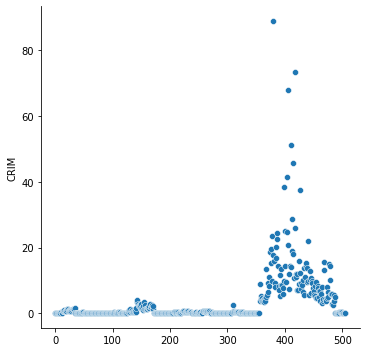

In [19]:
from sklearn.datasets import load_boston
import seaborn as sns

boston = load_boston()
x = boston['data']
y = boston['target']
col = boston['feature_names']

data = pd.DataFrame(x, columns=col)
data['Price'] = y

print(data.head())

print(data['CRIM'].skew())

print(data['CRIM'].value_counts())
X=[i for i in range(80)]
sns.relplot(data=data['CRIM'])

### ############################################################

## 4.Log Transform
Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. What are the benefits of log transform:
<ul>
   <li> It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
   <li> In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that. </li>
   <li> It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.</li>
</ul>

<b>A critical note:</b> The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.
    
<b>Log(x+1)</b>

In [20]:
# Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['log(x+1)'] = (data['value']+1).transform(np.log)

# Handling negative values
# Note that the values are different
data['log(x-min(x)+1)'] = (data['value']-data['value'].min()+1).transform(np.log)

print(data)

   value  log(x+1)  log(x-min(x)+1)
0      2  1.098612         3.258097
1     45  3.828641         4.234107
2    -23       NaN         0.000000
3     85  4.454347         4.691348
4     28  3.367296         3.951244
5      2  1.098612         3.258097
6     35  3.583519         4.077537
7    -12       NaN         2.484907


## 5.One-hot encoding
One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information

<b>Why One-Hot?:</b> If you have N distinct values in the column, it is enough to map them to N-1 binary columns, because the missing value can be deducted from other columns. If all the columns in our hand are equal to 0, the missing value must be equal to 1. This is the reason why it is called as one-hot encoding. However, I will give an example using the get_dummies function of Pandas. This function maps all values in a column to multiple columns.

In [21]:
data = pd.DataFrame({
          'A':['a','b','a'],
          'B':['b','a','c']
        })

print(data)

# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['B'])

# Drop column B as it is now encoded
data = data.drop('B',axis = 1)

# Join the encoded df
data = data.join(one_hot)

print(data)

   A  B
0  a  b
1  b  a
2  a  c
   A  a  b  c
0  a  0  1  0
1  b  1  0  0
2  a  0  0  1


### # One-hot encoding using scikit-learn

In [22]:
from sklearn.preprocessing import OneHotEncoder

data = np.array([15,4,9,11])

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(data.reshape(len(data),1))
print(one_hot_encoded)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = np.array(['Red', 'Green', 'Blue', 'Orange'])

label_enc = LabelEncoder()

label_encoded = label_enc.fit_transform(data)

print(label_encoded)

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(label_encoded.reshape(len(data),1))
print(one_hot_encoded)

[3 1 0 2]
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


## 6. Grouping Operations

## 7. Feature Split

Splitting features is a good way to make them useful in terms of machine learning. Most of the time the dataset contains string columns that violates tidy data principles. By extracting the utilizable parts of a column into new features:

- We enable machine learning algorithms to comprehend them.
- Make possible to bin and group them.
- Improve model performance by uncovering potential information.

<b>Split</b> function is a good option, however, there is no one way of splitting features. It depends on the characteristics of the column, how to split it. Let’s introduce it with two examples. First, a simple split function for an ordinary name column:

In [24]:
data = pd.DataFrame({'Name': ['first1 last1', 'first2 last2', 'first3 last3', 'first4 last4', 'first5 last5']})

# Extracting first names
data['FirstName'] = data['Name'].str.split(' ').map(lambda x: x[0])

# Extracting last name
data['LastName'] = data['Name'].str.split(' ').map(lambda x: x[-1])

print(data)

           Name FirstName LastName
0  first1 last1    first1    last1
1  first2 last2    first2    last2
2  first3 last3    first3    last3
3  first4 last4    first4    last4
4  first5 last5    first5    last5


The example above handles the names longer than two words by taking only the first and last elements and it makes the function robust for corner cases, which should be regarded when manipulating strings like that.

Another case for split function is to extract a string part between two chars. The following example shows an implementation of this case by using two split functions in a row.


In [25]:
data = pd.DataFrame({'Title': ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', \
                               'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)']})

# data['Year'] = data['Title'].str.split('(').map(lambda x: x[-1]).str.split(')').map(lambda x: x[0])
# or
data['Year'] = data['Title'].str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]
print(data)

                                Title  Year
0                    Toy Story (1995)  1995
1                      Jumanji (1995)  1995
2             Grumpier Old Men (1995)  1995
3            Waiting to Exhale (1995)  1995
4  Father of the Bride Part II (1995)  1995


## 8. Scaling

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?

Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for many algorithms, but it might be still nice to apply. However, the algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

Basically, there are two common ways of scaling:

### (1) Normalization
<img src="https://miro.medium.com/max/168/1*D3ORMiW9A7GoTezFYbL8LA.png">

Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and <b>due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.</b>


In [26]:
data = pd.DataFrame({'Value':[2, 45, -23, 85, 28, 2, 35, -12]})

data['Normalized'] = ( data['Value'] - data['Value'].min() ) / ( data['Value'].max() - data['Value'].min())

print(data)

   Value  Normalized
0      2    0.231481
1     45    0.629630
2    -23    0.000000
3     85    1.000000
4     28    0.472222
5      2    0.231481
6     35    0.537037
7    -12    0.101852


### (2) Standardization
Standardization (or <b>z-score normalization</b>) scales the values while taking into account standard deviation. If the <b>standard deviation</b> of features is different, their range also would differ from each other. <b>This reduces the effect of the outliers in the features</b>.

In the following formula of standardization, the mean is shown as <b>μ</b> and the standard deviation is shown as <b>σ</b>.
<img src="https://miro.medium.com/max/82/1*BcNLM9loyAR3YQLt2hDqqg.png">


In [27]:
data = pd.DataFrame({'Value':[2,45, -23, 85, 28, 2, 35, -12]})

data['Standardized'] = ( data['Value'] - data['Value'].mean() ) / data['Value'].std()
print(data)

   Value  Standardized
0      2     -0.518878
1     45      0.703684
2    -23     -1.229670
3     85      1.840952
4     28      0.220346
5      2     -0.518878
6     35      0.419367
7    -12     -0.916922


## 9. Extracting Date
Though date columns usually provide valuable information about the model target, they are neglected as an input or used nonsensically for the machine learning algorithms. It might be the reason for this, that dates can be present in numerous formats, which make it hard to understand by algorithms, even they are simplified to a format like <b>"01–01–2017"</b>.

Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation. Here, I suggest three types of preprocessing for dates:
- Extracting the parts of the date into different columns: Year, month, day, etc.
- Extracting the time period between the current date and columns in terms of years, months, days, etc.
- Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

If you transform the date column into the extracted columns like above, the information of them become disclosed and machine learning algorithms can easily understand them.

In [28]:
from datetime import date

data = pd.DataFrame({'DATE':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

# transform string to date
data['DATE'] = pd.to_datetime(data.DATE, format="%d-%m-%Y")

# Extracting Year
data['Year'] = data['DATE'].dt.year

# Extracting Month
data['Month'] = data.DATE.dt.month

# Extracting passed years since the date
data['Passed_Years'] = date.today().year - data['DATE'].dt.year

# Extracting passed months since the date
data['Passed_Months'] = (date.today().year - data['DATE'].dt.year)*12 + (date.today().month - data['DATE'].dt.month)

# Extracting the weekday name of the date
data['Weekday_Name'] = data['DATE'].dt.day_name()

print(data)

        DATE  Year  Month  Passed_Years  Passed_Months Weekday_Name
0 2017-01-01  2017      1             4             49       Sunday
1 2008-12-04  2008     12            13            146     Thursday
2 1988-06-23  1988      6            33            392     Thursday
3 1999-08-25  1999      8            22            258    Wednesday
4 1993-02-20  1993      2            28            336     Saturday


## Conclusion
We saw fundamental methods that can be beneficial in the feature engineering process. After this article, proceeding with other topics of data preparation such as <b>feature selection, train/test splitting, and sampling</b> might be a good option.

These techniques are not magical tools. If your data tiny, dirty and useless, feature engineering may remain incapable.